In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import gnc_utils
from utils import camera_fov_utils

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


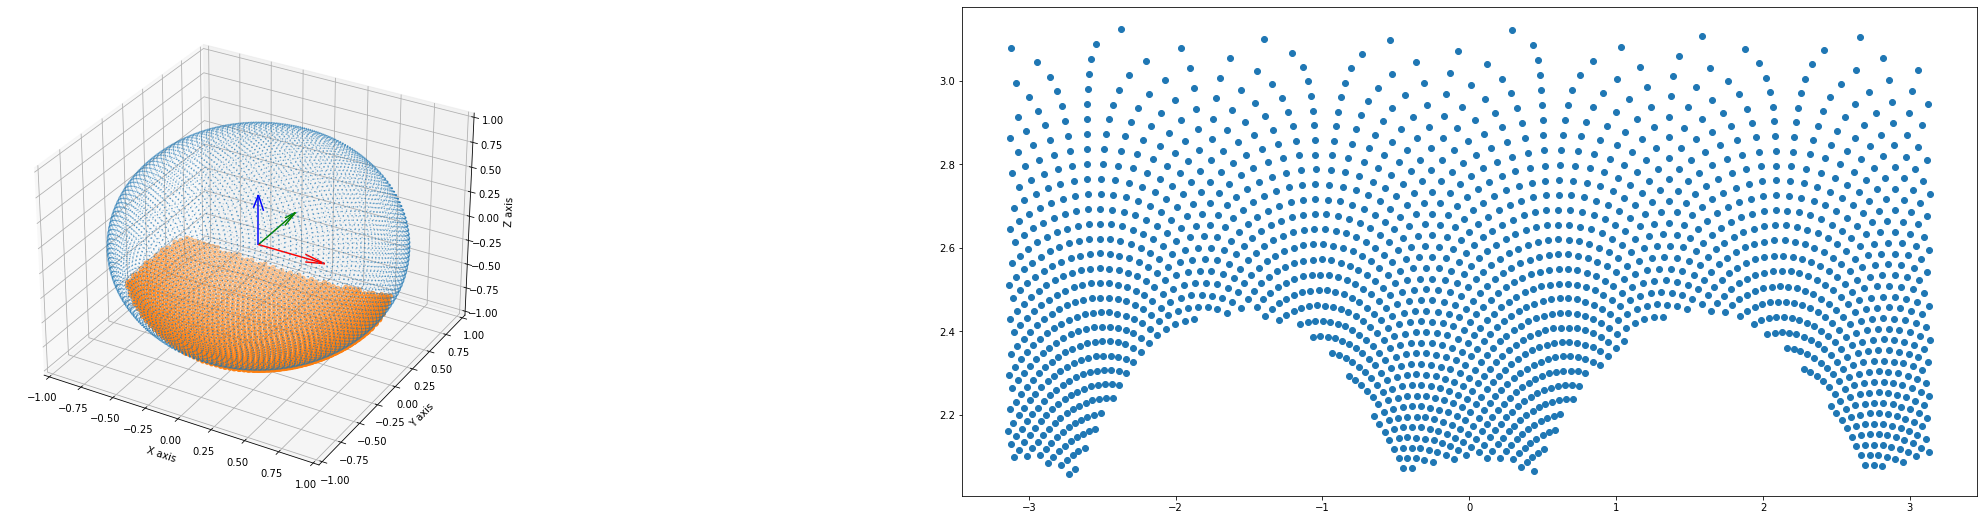

In [6]:
fig = plt.figure(figsize=(40, 9))
ax1 = fig.add_subplot(121, projection="3d")
ax2 = fig.add_subplot(122)

DEG_2_RAD = np.pi / 180

DCM = np.eye(3)
# DCM = gnc_utils.C1(45 * DEG_2_RAD)
# DCM = np.matmul(gnc_utils.C2(45 * DEG_2_RAD), DCM)
sphere_points = camera_fov_utils.fibonacci_sphere(samples=10000)
sphere_array = np.array(sphere_points)

for angle in [0]:
    triad = 0.5 * np.eye(3)
    # triad = np.matmul(gnc_utils.C3(angle * DEG_2_RAD), triad)
    triad = np.matmul(DCM, triad)

    ax1.quiver(0, 0, 0, *triad[0, :], color="red")  # X
    ax1.quiver(0, 0, 0, *triad[1, :], color="green")  # Y
    ax1.quiver(0, 0, 0, *triad[2, :], color="blue")  # Z. Coloring scheme follows SOLIDWORKS
    camera = camera_fov_utils.CameraFov(DCM)
    viewable_angles = camera_fov_utils.vec_in_fov(camera, sphere_array)

ax1.scatter(sphere_array[:, 0], sphere_array[:, 1], sphere_array[:, 2], ".", s=0.2)
ax1.scatter(viewable_angles[:, 0], viewable_angles[:, 1], viewable_angles[:, 2])
ax1.set_xlim3d((-1, 1))
ax1.set_ylim3d((-1, 1))
ax1.set_zlim3d((-1, 1))
ax1.set_xlabel("X axis")
ax1.set_ylabel("Y axis")
ax1.set_zlabel("Z axis")


phis = np.arccos(viewable_angles[:, 2])
thetas = np.arctan2(viewable_angles[:, 1], viewable_angles[:, 0])
ax2.scatter(thetas, phis)
